In [8]:
import pandas as pd;import numpy as np; import matplotlib.pyplot as plt; 
import pickle
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

In [9]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Function Declaration

In [10]:
# This function extracts the outlier points (the red points) from the z catalogue. 
def outlier_points(zp,zs):
        tmp_x      = np.where( (zp > float(0.00)) & (zp < float(3.0)) )[0]  # Change here 0 or 0.300
        tmp_ztrue  = zs[tmp_x]
        tmp_z_phot  = zp[tmp_x]
        tmp_dz     = ( tmp_ztrue - tmp_z_phot ) / ( 1.0 + tmp_z_phot )
        q75, q25   = np.percentile( tmp_dz, [75 ,25]) # COR IQR
        sigma      = ( q75 - q25 ) / float(1.349)
        threesigma = float(3.0) * sigma
        ox = np.where( ( np.fabs( tmp_dz ) > float(0.0600) ) & ( np.fabs( tmp_dz ) > threesigma ) )[0]
        tmp_z_phot1=[];tmp_z_true1=[];
        for i in range(len(ox)):
            tmp_z_phot1.append(tmp_z_phot.iloc[ox[i]])
            tmp_z_true1.append(tmp_ztrue.iloc[ox[i]])
        zp = pd.DataFrame(tmp_z_phot1)
        zs = pd.DataFrame(tmp_z_true1)  
        zt = pd.concat([zp,zs],axis=1)
        zt.columns = ['zphoto','zspec']
        return zt

In [11]:
# This function extracts the catastrophic outlier points (the golden points) from the z catalogue. 
def cat_outlier(zp,zs):
        tmp_x      = np.where( (zp > float(0.00)) & (zp <= float(3.0)) )[0] # Change here 0 or 0.300
        tmp_ztrue  = zs[tmp_x]
        tmp_z_phot  = zp[tmp_x]
        tmp_dz     = ( tmp_ztrue - tmp_z_phot )
        ox = np.where( np.fabs( tmp_dz ) > float(1.5) )[0]
        tmp_z_phot1=[];tmp_z_true1=[];
        for i in range(len(ox)):
            tmp_z_phot1.append(tmp_z_phot.iloc[ox[i]])
            tmp_z_true1.append(tmp_ztrue.iloc[ox[i]])
        zp = pd.DataFrame(tmp_z_phot1)
        zs = pd.DataFrame(tmp_z_true1)  
        zt = pd.concat([zp,zs],axis=1)
        zt.columns = ['zphoto','zspec']
        return zt  

# ----------------------------------------

### Reading in the WFIRST data file

In [12]:
bb = pd.read_csv('LSST_data_with_id.csv',sep=" ")# photoz catalogue : WFIRST DATA

In [13]:
bb

,id,z_true,z_phot
0,851111,0.0170,0.0797
1,407570,0.0202,0.0202
2,842995,0.0205,0.0228
3,310087,0.0222,2.3348
4,226179,0.0223,0.0223
...,...,...,...
178277,942712,3.4967,3.4533
178278,104469,3.4969,0.4332
178279,144918,3.4971,3.4917
178280,778816,3.4981,3.4669


In [14]:
bb.min()

id        2.0000
z_true    0.0170
z_phot    0.0202
dtype: float64

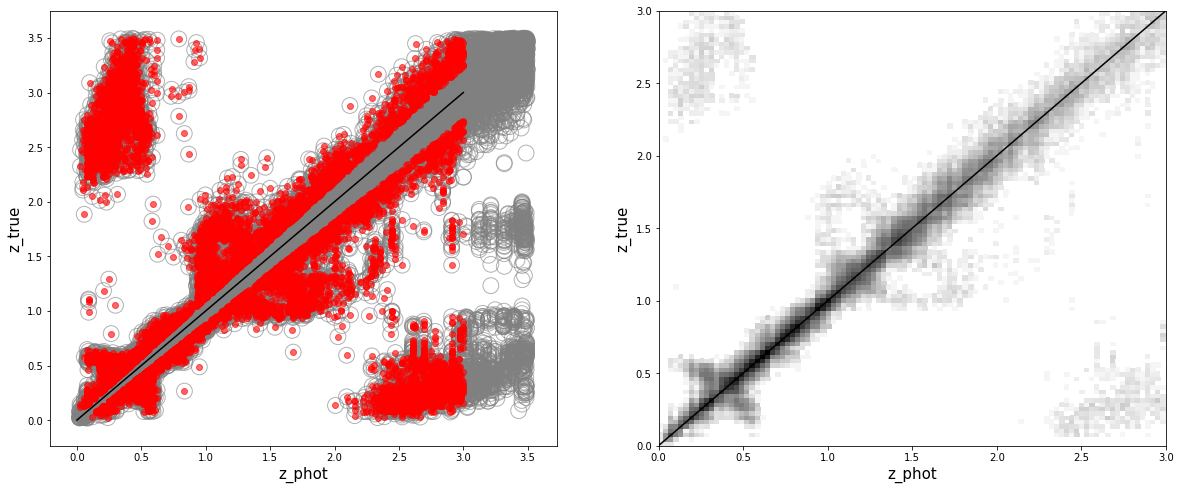

In [15]:
plt.rcParams['figure.figsize'] = [20,8] 
plt.subplot(1,2,1)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
 #           cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='r')
plt.scatter(bb.z_phot,bb.z_true,s=250,facecolors='none', edgecolors='grey',alpha=0.6)
plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

plt.subplot(1,2,2)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys',alpha=2.5);

plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

In [16]:
print('Total No. of Outliers [Upto z~3.0]')
len(outlier_points(bb['z_phot'],bb['z_true']))

Total No. of Outliers [Upto z~3.0]


17187

In [17]:
print('Minimum z-spectro in Core:')
np.min(bb.z_phot[tx])

Minimum z-spectro in Core:


0.0202

In [18]:
print('Minimum z-spectro in Outliers:')
np.min(outlier_points(bb['z_phot'],bb['z_true']).zspec)

Minimum z-spectro in Outliers:


0.0222

### Checking between Outliers and Catastrophic outliers

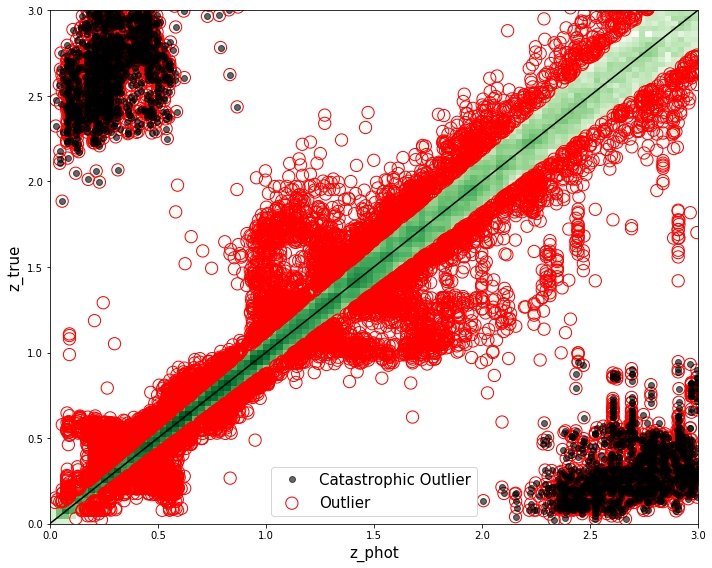

In [19]:
tx = np.where( bb.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

#plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
 #        alpha=0.3,c='b')

plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='black',label='Catastrophic Outlier')# In outlier fn, change limit from 0 to 3

plt.scatter(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,
            s=150,facecolors='none', edgecolors='r',label='Outlier')
plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.xlim(0.,0.8)
#plt.ylim(1.5,3.0)
#plt.axhline(0.1)
plt.tight_layout()
plt.legend(fontsize=15)
#plt.savefig('tzpz_from_zphot_cat-catastrophic_check1_WFIRST.pdf',bbox_inches='tight')

### There are overlapping outlier-catastrophic outlier points, which is already known. 

#### Catastrophic Outliers Check

In [20]:
print('Total No. of Catastrophic Outliers')
len(cat_outlier(bb['z_phot'],bb['z_true']).zphoto)

Total No. of Catastrophic Outliers


2770

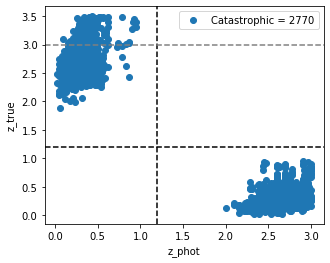

In [21]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,
         cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',label='Catastrophic = %s'%(len(cat_outlier(bb['z_phot'],bb['z_true']).zphoto)))
plt.axhline(1.2,c='black',linestyle='--');plt.axvline(1.2,c='black',linestyle='--')
plt.axhline(3.0,c='grey',linestyle='--')
plt.xlabel('z_phot');plt.ylabel('z_true')
plt.legend(loc='best')

Text(0, 0.5, 'z_true')

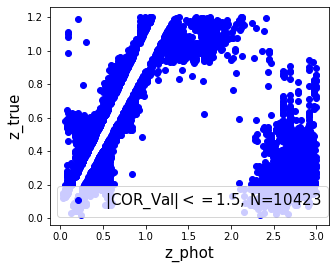

In [22]:
columns=['x','y']
index=range(0,len(outlier_points(bb['z_phot'],bb['z_true']).zphoto))
r_core = pd.DataFrame(columns=columns,index=index)
r_core['x']=outlier_points(bb['z_phot'],bb['z_true']).zphoto
r_core['y']=outlier_points(bb['z_phot'],bb['z_true']).zspec

r_core = r_core.sort_values('y')   
r_core.reset_index(inplace = True, drop = True) 
r_core = r_core.sort_values(by=['y']) 
r_core = r_core[r_core.y<=1.2] # Taking points only upto z_true <=1.2
plt.plot(r_core.x,r_core.y,'o',c='b',label=r'$\rm |COR\_Val|<=1.5$, N=%s'%(len(r_core.x)))   
#plt.xlim(0,3.0);plt.ylim(0,3.0)
plt.legend(fontsize=15)
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

### the three blue points in the right side are also Catastrophic points as seen from the previous plots. So we will not identify them as outliers anymore and reject them. 

In [23]:
np.shape(r_core)

(10423, 2)

In [24]:
r_core = r_core[r_core.x<2] # Removing the three catastrophic points in the right side

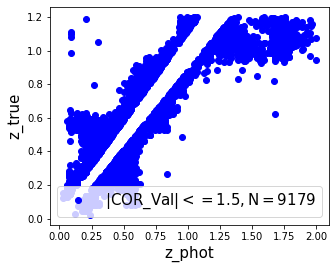

In [25]:
plt.plot(r_core.x,r_core.y,'o',c='b',label=r'$\rm |COR\_Val|<=1.5, N=%s$'%(len(r_core.x)))   
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.legend(fontsize=15)

### Now we have the outliers points, with z<1.2 and removed from all catastrophic points as well
### --------------------

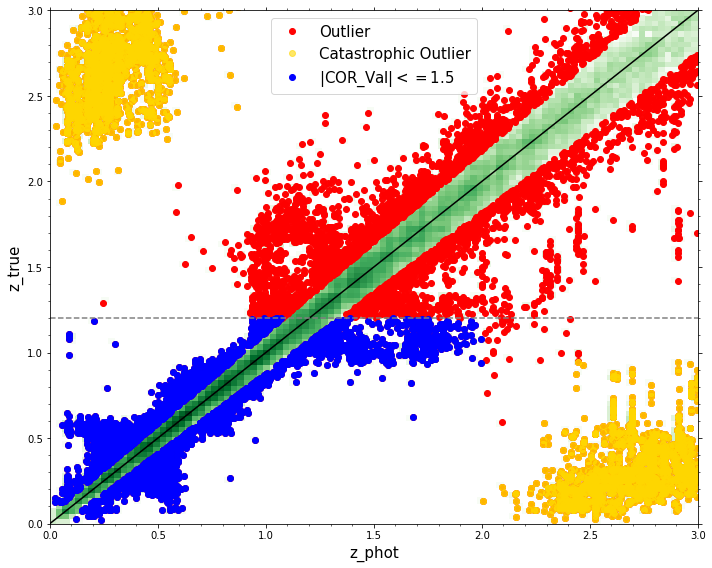

In [26]:
tx = np.where( bb.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
fig, ax = plt.subplots()
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens');

plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.99,c='r',label='Outlier')
plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='gold',label='Catastrophic Outlier')
#plt.scatter(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,
 #           s=150,c='r',label='Outlier')
plt.plot(r_core.x,r_core.y,'o',c='b',label=r'$\rm |COR\_Val|<=1.5$')    
plt.plot([0.0,3.0],[0.0,3.0],color='black')
plt.plot(cat_outlier(bb['z_phot'],bb['z_true']).zphoto,cat_outlier(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.6,c='gold',label='_nolabel_')
#plt.xlim(0.,0.3)
#plt.ylim(2.0,3.0)
plt.axhline(1.2,c='grey',linestyle='--')
plt.tight_layout()
plt.legend(loc='upper center',fontsize=15)
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#plt.savefig('Meliisa_email_plots/tzpz_from_zphot_cat-catastrophic_check2.pdf',bbox_inches='tight')
#plt.savefig('P2.pdf',bbox_inches='tight')

# 24 Bins

In [27]:
# Assigning the outliers to a new variable, to keep the original unchanged. 
tzpz_out = r_core #outlier_points(bb['z_phot'],bb['z_true'])
tzpz_out.columns = ['zphoto','zspec'] # Specifying the column names
tzpz_out = tzpz_out.sort_values('zspec')  # Sorting by z_true redshift value
#tzpz_out.to_csv('tzpz_plotting/tzpz_plotting_data_red.csv',sep=' ',index=False)
#blue_w=pd.read_csv('../Data/blue_WFIRST.csv',sep=' ')
#blue_w
#blue_w = blue_w.dropna()
#blue_w.columns=['zspec','zphoto']
#tzpz_out = blue_w

In [28]:
red = tzpz_out[tzpz_out['zspec']<=1.2] # Outlier  z_spec<= 1.2
grey = bb[bb['z_true']<=1.2] # Core z_spec<= 1.2

In [29]:
grey

,id,z_true,z_phot
0,851111,0.0170,0.0797
1,407570,0.0202,0.0202
2,842995,0.0205,0.0228
3,310087,0.0222,2.3348
4,226179,0.0223,0.0223
...,...,...,...
128132,159700,1.1999,1.2563
128133,832297,1.1999,1.0501
128134,969415,1.2000,1.1662
128135,483834,1.2000,1.0487


Text(0, 0.5, 'z_true')

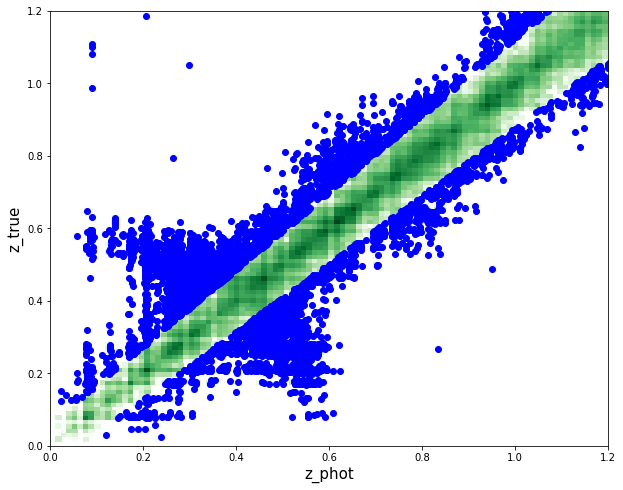

In [30]:
tx = np.where( grey.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
fig, ax = plt.subplots()
plt.hist2d( grey.z_phot[tx], grey.z_true[tx], bins=100, range=[[0.0,1.2],[0.0,1.2]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens');
plt.plot(red.zphoto,red.zspec,'o',c='b')
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

In [31]:
# Outliers
tzpz_out

,zphoto,zspec
1,0.2387,0.0226
4,0.1202,0.0296
9,0.1743,0.0456
10,0.1887,0.0458
11,0.2051,0.0458
...,...,...
10418,1.0716,1.1995
10419,1.3876,1.1997
10420,0.9907,1.1998
10421,1.0501,1.1999


In [32]:
# Core
grey.iloc[:, :2]

,id,z_true
0,851111,0.0170
1,407570,0.0202
2,842995,0.0205
3,310087,0.0222
4,226179,0.0223
...,...,...
128132,159700,1.1999
128133,832297,1.1999
128134,969415,1.2000
128135,483834,1.2000


### Bin

In [33]:
# Making Bins, because we will break the data in bins now. 
bins  = np.linspace(0,1.2,25)
start = (bins[0] + bins[1])/2.; end = (bins[-1] + bins[-2])/2.

label = np.linspace(start,end,24)
print(label)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175]


In [36]:
bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 ])

## Binning the Core Points

In [34]:
# Binning the data to compute the mean redshifts per bin and the no. of candidates
#bins = np.linspace(0,1.2,13)
#label = np.linspace(0.05,1.15,12)


# Calling the 'tzpz_main_points' file and extracting pts < 1.5 COR
bb = grey.iloc[:, :2]


bb['bin_z'] = pd.cut(bb.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)

tzpz_main = bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).mean()
tzpz_main.columns = ['z_true_mean','z_phot_mean']
tzpz_main.reset_index(drop=True, inplace=True)
#tzpz_main_points = tzpz_main
tzpz_main =  pd.concat([tzpz_main,N],axis=1,ignore_index=True)
tzpz_main =  pd.concat([tzpz_main,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_main.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_main = tzpz_main[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_main = tzpz_main.iloc[0:24 , : ]
#tzpz_main = tzpz_main.sort_values('z_true_mean')  
tzpz_main

,Bin,N,z_true_mean,z_phot_mean
0,0.025,74,457314.527027,0.039312
1,0.075,1230,481504.400000,0.082405
2,0.125,962,499384.797297,0.131200
3,0.175,1516,530011.291557,0.177872
4,0.225,3738,472604.407972,0.218347
5,0.275,5976,484265.406124,0.271682
6,0.325,5030,538128.065805,0.320465
7,0.375,4105,498460.191961,0.378496
8,0.425,6579,535200.606779,0.426538
9,0.475,8744,478062.130718,0.472809


In [46]:
print('Total No. of Core points :')
tzpz_main['N'].sum()

Total No. of Core points :


128137

## Bining the Outlier points

In [37]:
#bins = np.linspace(0,1.2,13)
#label = np.linspace(0.05,1.15,12)
tzpz_out_COR = red
tzpz_out_COR = tzpz_out_COR[['zphoto','zspec']]
tzpz_out_COR.columns=['z_phot','z_true']
tzpz_out_COR['bin_z'] = pd.cut(tzpz_out_COR.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)
#tzpz_out_COR = tzpz_out_COR.drop(['COR_val'],axis=1)
print(N)
tzpz_outt = tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.z_true, bins=bins,labels=label)).mean()
#print(tzpz_outt)
tzpz_outt.columns = ['z_true_mean','z_phot_mean']
tzpz_outt.reset_index(drop=True, inplace=True)

tzpz_outt =  pd.concat([tzpz_outt,N],axis=1,ignore_index=True)
tzpz_outt =  pd.concat([tzpz_outt,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_outt.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_outt = tzpz_outt[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_outt = tzpz_outt.iloc[0:24 , :]
#tzpz_outt = tzpz_outt.sort_values('z_true_mean')  
tzpz_outt['f_out'] = tzpz_outt.N/(tzpz_main.N)
#tzpz_outt

       N
0      5
1     66
2     56
3    166
4    464
5    872
6    693
7    536
8    575
9   1345
10  1127
11   483
12   353
13   189
14   198
15   265
16   253
17   170
18   178
19   219
20   242
21   353
22   225
23   146


In [38]:
tzpz_outt = tzpz_outt.fillna(0)

In [47]:
# Sum of Outlier points
tzpz_outt['N'].sum()

9179

In [48]:
# Fractional outlier SUM
tzpz_outt['f_out'].sum()

1.76331173097977

In [41]:
test = pd.concat([tzpz_main,tzpz_outt.iloc[: , 1:]],axis=1)
test.columns = ['Bin','N_G','z_true_mean_G','z_phot_mean_G','N_R','z_true_mean_R','z_phot_mean_R','fout']
test['COR_Outlier_Bias'] = (test.z_true_mean_R - test.z_phot_mean_R)/(1+test.z_phot_mean_R)

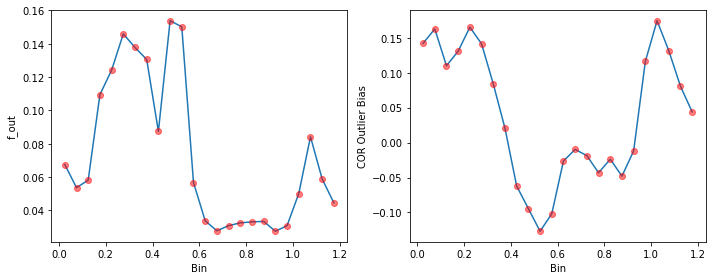

In [42]:
plt.rcParams['figure.figsize'] = [10,4]
plt.subplot(1,2,1)
plt.plot(test.Bin,test.fout)
plt.plot(test.Bin,test.fout,'o',c='r',alpha=0.5)
plt.xlabel('Bin')
plt.ylabel('f_out')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(test.Bin,test.COR_Outlier_Bias)
plt.plot(test.Bin,test.COR_Outlier_Bias,'o',c='r',alpha=0.5)
plt.xlabel('Bin')
plt.ylabel('COR Outlier Bias')
plt.tight_layout()

In [43]:
# G = Green/Grey : Core
# R = Red : Outlier
test

,Bin,N_G,z_true_mean_G,z_phot_mean_G,N_R,z_true_mean_R,z_phot_mean_R,fout,COR_Outlier_Bias
0,0.025,74,457314.527027,0.039312,5,0.185400,0.037880,0.067568,0.142136
1,0.075,1230,481504.400000,0.082405,66,0.258645,0.082405,0.053659,0.162824
2,0.125,962,499384.797297,0.131200,56,0.258389,0.133654,0.058212,0.110030
3,0.175,1516,530011.291557,0.177872,166,0.330345,0.176259,0.109499,0.130996
4,0.225,3738,472604.407972,0.218347,464,0.417237,0.216155,0.124131,0.165343
5,0.275,5976,484265.406124,0.271682,872,0.451829,0.271971,0.145917,0.141401
6,0.325,5030,538128.065805,0.320465,693,0.433151,0.322034,0.137773,0.084050
7,0.375,4105,498460.191961,0.378496,536,0.403447,0.375098,0.130572,0.020615
8,0.425,6579,535200.606779,0.426538,575,0.337542,0.426260,0.087399,-0.062203
9,0.475,8744,478062.130718,0.472809,1345,0.337243,0.476752,0.153820,-0.094470


Text(0.47, 0.1, '$\\delta z$')

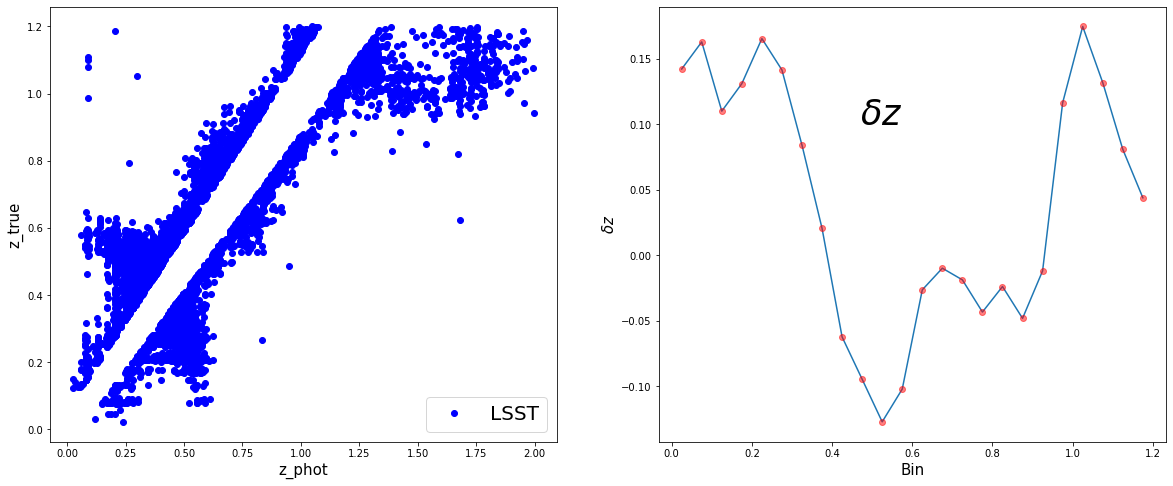

In [49]:
plt.rcParams['figure.figsize'] = [20,8]
fig,(a1,a2)=plt.subplots(1, 2, figsize=(20, 8))
a1.plot(tzpz_out.zphoto,tzpz_out.zspec,'o',c='b',label='LSST')
a1.set_xlabel('z_phot',fontsize=15);a1.set_ylabel('z_true',fontsize=15)
a1.legend(fontsize=20)
#a.subplot(1,2,2)
a2.plot(test.Bin,test.COR_Outlier_Bias)
a2.plot(test.Bin,test.COR_Outlier_Bias,'o',c='r',alpha=0.5)
a2.set_xlabel('Bin',fontsize=15)
a2.set_ylabel('$\delta z$',fontsize=15)
a2.text(0.47,0.1,'$\delta z$',color='black',fontsize=35)

In [45]:
#with open('myplot_WFIRST.pkl','wb') as fid:
 #   pickle.dump(fig, fid)